# WeatherPy

In [1]:
!pip install citipy


Observations:
- 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.cm as cm

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

# Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# Create url
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define units
units = 'imperial'

# Create query url with weather_api_key and units
query = f"{url}appid={weather_api_key}&units={units}&q="

# Json response
response = requests.get(query + city).json()
response

{'coord': {'lon': -133.0374, 'lat': 69.4541},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': -27.4,
  'feels_like': -37.68,
  'temp_min': -27.4,
  'temp_max': -27.4,
  'pressure': 1028,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 230},
 'clouds': {'all': 20},
 'dt': 1611788515,
 'sys': {'type': 1,
  'id': 942,
  'country': 'CA',
  'sunrise': 1611773587,
  'sunset': 1611789399},
 'timezone': -25200,
 'id': 6170031,
 'name': 'Tuktoyaktuk',
 'cod': 200}

In [6]:
# Create list of items for data frame
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
set_one = 1

# Print Beginning Data Retrieval
print(f'Beginning Data Retrieval')
print(f'----------------------------------')

# Running a loop to append data to lists
for city in cities:
    try:
        response = requests.get(query + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_record = response ['name']
        if record > 49:
            record = 1
            set_one += 1
        else:
            record += 1
        
#       Print if city is found
        print(f'Processing Record {record} of Set {set_one} | {city_record}')
        
#       Print if city is not found
    except: 
        print(f'City not found.  Skipping...')

# Print Data Retrieval Complete
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
----------------------------------
City not found.  Skipping...
Processing Record 1 of Set 1 | Sept-Îles
Processing Record 2 of Set 1 | Nyurba
City not found.  Skipping...
Processing Record 3 of Set 1 | Haines Junction
Processing Record 4 of Set 1 | Hobart
Processing Record 5 of Set 1 | Butaritari
Processing Record 6 of Set 1 | Castro
Processing Record 7 of Set 1 | Chui
Processing Record 8 of Set 1 | Avarua
Processing Record 9 of Set 1 | Meulaboh
Processing Record 10 of Set 1 | Norman Wells
Processing Record 11 of Set 1 | Tiksi
Processing Record 12 of Set 1 | Esperance
Processing Record 13 of Set 1 | Port Alfred
Processing Record 14 of Set 1 | Atuona
Processing Record 15 of Set 1 | Iqaluit
Processing Record 16 of Set 1 | Vaini
Processing Record 17 of Set 1 | Cap Malheureux
Processing Record 18 of Set 1 | Mataura
Processing Record 19 of Set 1 | Ushuaia
Processing Record 20 of Set 1 | Acapulco de Juárez
Processing Record 21 of Set 1 | Kahului
Processing Record 22

Processing Record 33 of Set 4 | Manadhoo
Processing Record 34 of Set 4 | Newala
Processing Record 35 of Set 4 | Burnie
Processing Record 36 of Set 4 | Talaya
Processing Record 37 of Set 4 | Lompoc
Processing Record 38 of Set 4 | Srikakulam
Processing Record 39 of Set 4 | Hammerfest
City not found.  Skipping...
Processing Record 40 of Set 4 | Portland
Processing Record 41 of Set 4 | Fairbanks
City not found.  Skipping...
Processing Record 42 of Set 4 | Hutchinson
City not found.  Skipping...
Processing Record 43 of Set 4 | Lesogorsk
Processing Record 44 of Set 4 | Kavaratti
Processing Record 45 of Set 4 | Městec Králové
Processing Record 46 of Set 4 | Araguaína
Processing Record 47 of Set 4 | Provideniya
Processing Record 48 of Set 4 | Krasnosel'kup
Processing Record 49 of Set 4 | Ambon City
City not found.  Skipping...
Processing Record 50 of Set 4 | Pangnirtung
Processing Record 1 of Set 5 | Along
Processing Record 2 of Set 5 | Hobyo
Processing Record 3 of Set 5 | Leningradskiy
City n

Processing Record 20 of Set 8 | Guerrero Negro
Processing Record 21 of Set 8 | Rosetta
Processing Record 22 of Set 8 | Codrington
Processing Record 23 of Set 8 | Kyabé
City not found.  Skipping...
Processing Record 24 of Set 8 | Kinshasa
City not found.  Skipping...
Processing Record 25 of Set 8 | Comodoro Rivadavia
Processing Record 26 of Set 8 | Ulagan
Processing Record 27 of Set 8 | Port Blair
Processing Record 28 of Set 8 | Liaozhong
Processing Record 29 of Set 8 | Carolina
Processing Record 30 of Set 8 | Kiryat Gat
Processing Record 31 of Set 8 | Jaguaruna
Processing Record 32 of Set 8 | Lagoa
Processing Record 33 of Set 8 | Kangaatsiaq
Processing Record 34 of Set 8 | Regierungsbezirk Detmold
Processing Record 35 of Set 8 | Tomatlán
Processing Record 36 of Set 8 | Gisborne
Processing Record 37 of Set 8 | Mount Gambier
Processing Record 38 of Set 8 | Arona
Processing Record 39 of Set 8 | Srednekolymsk
Processing Record 40 of Set 8 | Chandler
Processing Record 41 of Set 8 | Olafsvik

Processing Record 6 of Set 12 | Oktyabr'skiy
Processing Record 7 of Set 12 | Gorom-Gorom
City not found.  Skipping...
Processing Record 8 of Set 12 | Manutuke
Processing Record 9 of Set 12 | Panabá
Processing Record 10 of Set 12 | Turochak
Processing Record 11 of Set 12 | San Vicente
Processing Record 12 of Set 12 | Itarema
-----------------------------
Data Retrieval Complete
-----------------------------


#  Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [7]:
# Create dictionary Data Frame aligning to data lists
city_data = pd.DataFrame({
    'City': city_name,
    'Country': country,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temperature (F)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed,
    'Date': date
})

# Print data frame and export to csv file
city_data.to_csv('../output_data/cities.csv', encoding="utf-8", index=False)
city_data

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Sept-Îles,CA,50.2001,-66.3821,23.00,58,15,8.05,1611788931
1,Nyurba,RU,63.2842,118.3319,-47.02,78,95,1.45,1611789246
2,Haines Junction,CA,60.7522,-137.5108,-9.40,54,83,0.20,1611788875
3,Hobart,AU,-42.8794,147.3294,59.00,47,75,8.05,1611788991
4,Butaritari,KI,3.0707,172.7902,80.20,81,82,13.24,1611789085
...,...,...,...,...,...,...,...,...,...
557,Manutuke,NZ,-38.6833,177.9167,82.76,41,22,3.83,1611789011
558,Panabá,MX,21.2833,-88.2667,82.27,69,13,7.92,1611789011
559,Turochak,RU,52.2576,87.1224,23.18,97,100,6.44,1611789011
560,San Vicente,AR,-26.6167,-54.1333,70.68,93,84,5.55,1611789012


# Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [8]:
#  Get the indices of cities that have humidity over 100%.
hund_humidity = city_data.loc[(city_data['Humidity (%)'] > 100) & (city_data['Humidity (%)'] <= 1000)]
hund_humidity_df = pd.DataFrame(hund_humidity)
len(hund_humidity_df)

0

# Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

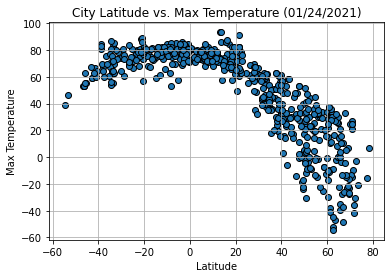

In [9]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Max Temperature (F)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
# plt.savefig('../output_data/Latitude_vs_Max_Temperature.png')
# plt.show()

# Latitude vs. Humidity Plot

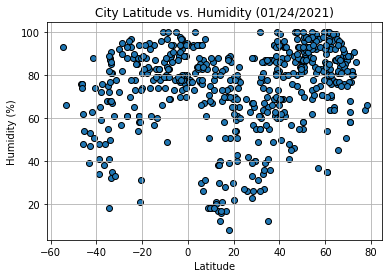

In [10]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Humidity (%)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
# plt.savefig('../output_data/Latitude_vs_Humidity.png')
# plt.show()

# Latitude vs. Cloudiness Plot

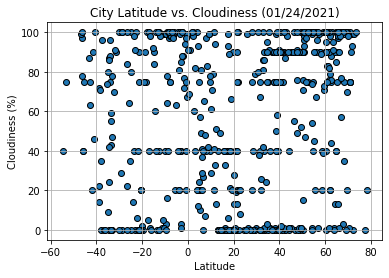

In [11]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Cloudiness (%)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
# plt.savefig('../output_data/Latitude_vs_Cloudiness.png')
# plt.show()

# Latitude vs. Wind Speed Plot

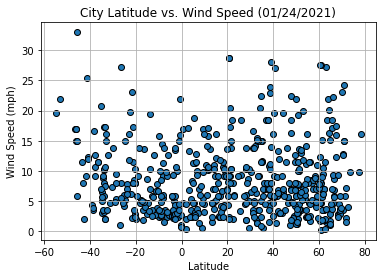

In [12]:
# Set x and y values
x_values = city_data['Latitude']
y_values = city_data['Wind Speed (mph)']

# Create scatter plot.  Set edgecolor
plt.scatter(x_values,y_values, edgecolor = 'black')

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (01/24/2021)')

# Grid and display scatter plot
plt.grid(zorder=0)
plt.show()

# Save fig as png
# plt.savefig('../output_data/Latitude_vs_Wind_Speed.png')
# plt.show()

# Linear Regression

In [13]:
# Create northern and southern hemisphere variables. 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# Southern Hemisphere (less than 0 degrees latitude)
north_hem = city_data.loc[(city_data['Latitude'] >= 0) & (city_data['Latitude'] <= 90)]
south_hem = city_data.loc[(city_data['Latitude'] >= -90) & (city_data['Latitude'] < 0 )]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.723819354870497


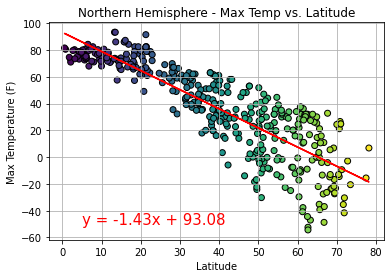

In [14]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Max Temperature (F)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,-50),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.grid(zorder = 0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.29635466067713934


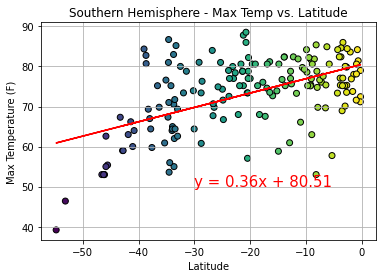

In [15]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Max Temperature (F)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.grid(zorder = 0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1213293660196573


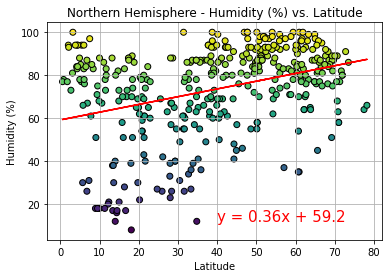

In [16]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Humidity (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.grid(zorder = 0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1983287531237146


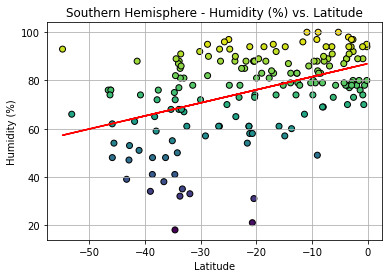

In [17]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Humidity (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-24,12),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11407858676600804


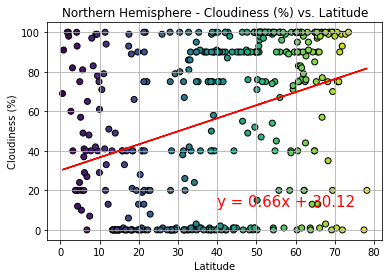

In [18]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028427859372917412


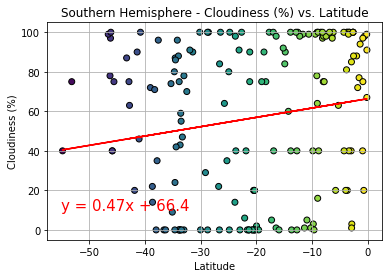

In [19]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness (%)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = x_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0003659425560118401


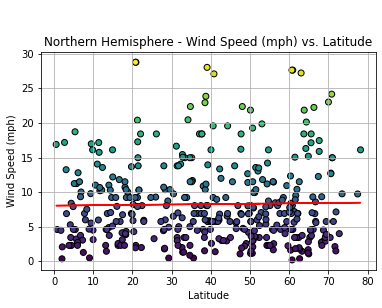

In [20]:
# Set x and y axis.  
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed (mph)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14032503500279342


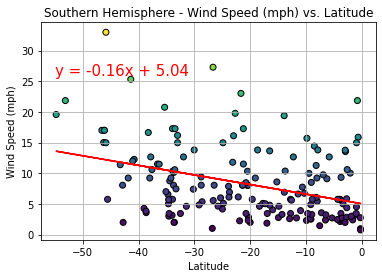

In [21]:
# Set x and y axis.  
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed (mph)']

# Create slope equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with line equation.  Annotate line of equation
t = y_values
plt.scatter(x_values,y_values, edgecolor = 'black', c=t)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,26),fontsize=15,color="red")

# Title, x label and y label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.grid(zorder=0)

# Print r value
print(f"The r-squared is: {rvalue**2}")

# Display scatter plot with equation and line
plt.show()